### load datasets

In [1]:
import pandas as pd

data_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
data_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = data_wine.iloc[:,1:].values, data_wine.iloc[:,0].values
print(X[0])
print(y[:5])

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
[1 1 1 1 1]


### Train, test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Preprocessing(1) : Normalize X data

In [4]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

## Calculate Aigen value, Aigen vector

In [5]:
import numpy as np

scov = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(scov)
print('Eigen values \n%s' %eigen_vals)

Eigen values 
[4.7095539  2.63606471 1.55728758 0.93422662 0.85129454 0.5709688
 0.46462025 0.37764772 0.10409155 0.14951983 0.21165109 0.2630501
 0.27571434]


## Issue: 몇 개의 주성분을 사용할 것인가?

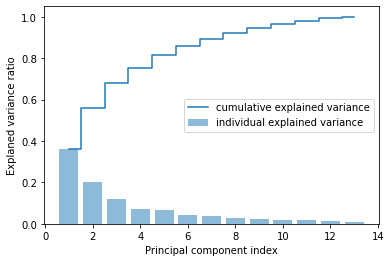

In [6]:
# Visualization for explain variance ratio
total = sum(eigen_vals)
var_exp = [(i/total) for i in sorted(eigen_vals, reverse=True)] # 내림차순 정렬
cum_var_exp = np.cumsum(var_exp) # 누적합 = 전체 분산

import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explaned variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

* 전체 분산 비율(cumulative variance ratio)의 70~80%를 포함하는 지점이 어디쯤인가

## Dimensional reduction using PCA

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

lr = LogisticRegression()

lpca = PCA(n_components=4) # 전체 분산 비율을 통해 주성분 개수를 4개로 선택!!!

X_train_pca = lpca.fit_transform(X_train_std) #PCA 적용
X_test_pca = lpca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

y_train_pred = lr.predict(X_train_pca)
y_test_pred = lr.predict(X_test_pca)

from sklearn import metrics
print("Train accuracy: ", metrics.accuracy_score(y_train, y_train_pred))
print("Test accuracy: ", metrics.accuracy_score(y_test, y_test_pred))

Train accuracy:  0.9758064516129032
Test accuracy:  0.9629629629629629
